# **해시 테이블(Hash Table)**

- 해시 테이블은 Key-Value 쌍으로 데이터를 저장하는 자료구조.
- 데이터의 Key를 알고 있으면, 데이터에 O(1)의 시간 복잡도로 접근할 수 있다.
  - 언뜻 보면 데이터베이스에 적합한 자료구조인 것 같음.
  - 하지만, DBMS들은 해시 테이블을 사용하지 않음.
  - 해시 테이블은 부등호 연산에 부적합하기 때문.
  - 해시 테이블의 데이터는 정렬되어 있지 않으므로, 'Key가 500보다 작은 데이터'를 찾기 위해서는 하기 위해서는 모든 데이터에 접근해야한다.
- 데이터베이스에서는 부등호 연산이 자주 발생하므로, 해시 테이블은 적합하지 않다.

- 부등호 연산은 < > 를 제외하고도 NOT 연산, '~로 시작하는 데이터 찾기' 등이 모두 포함.
- NOT 연산은 사실 대상보다 크거나 작은 데이터를 찾는 연산이고, '~로 시작하는' 연산 또한 사전순으로 정렬된 데이터에서의 부등호 연산이기 때문.

# **B-Tree**

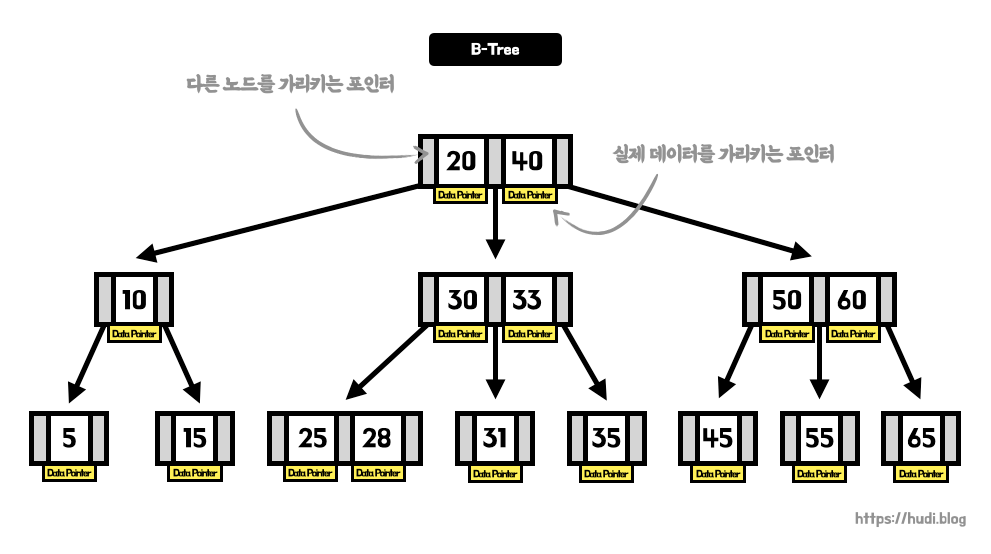

- B-Tree는 메모리에 담기 어려운 큰 크기의 데이터를 다루기 위해 사용.
  - 파일 시스템 혹은 데이터베이스에 적합하다.

- B-Tree는 이진 탐색 트리(binary search tree, BST)의 일반화된 형태.
- 이진 탐색 트리가 자식 노드가 2개 이하인 트리라면, B-Tree는 자식 노드가 2개 이상인 트리.
- 노드의 개수를 늘리고 트리의 전체 높이를 줄여서 빠른 탐색 속도를 얻을 수 있다.
- 최대 M개의 자식을 가질 수 있는 B-Tree를 M차 B-Tree라고 한다.

<br>

**같은 레벨을 유지하는 리프 노드**

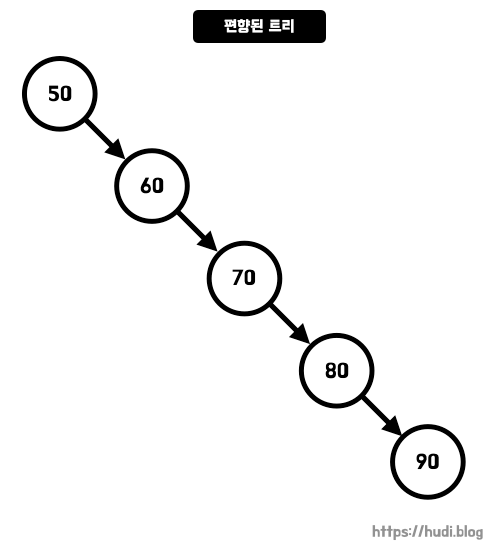

- B-Tree의 중요한 특징으로는 리프 노드(leaf node)가 모두 같은 레벨을 갖는다는 점.
- 일반적인 이진 트리는 위 그림과 같이 한쪽 방향으로만 편향될 가능성이 존재.
- 이런 경우 트리 자료구조의 빠른 탐색 속도라는 이점을 누리지 못하고, 링크드리스트와 같이 동작할 수 있는 위험을 갖는다.
- 하지만, B-Tree는 의도적으로 리프 노드의 레벨을 동일하게 유지함으로써 위와 같은 문제를 해결.
- 이런 특성을 갖는 트리를 Self-Balanced Search Tree라고 한다.

<br>

**키(key)와 포인터(pointer)**

- 일반적인 이진 트리와 다르게, 한 노드에 여러 데이터를 가질 수 있다.
- 데이터베이스에서는 B-Tree의 노드를 페이지 또는 블럭이라고 부르며, 노드 내의 데이터를 키(key)라고 부른다.
- M차 B-Tree의 노드는 최대 M-1 개의 키를 가질 수 있다.
- 노드 내부의 키들은 항상 오름차순으로 정렬된 상태를 유지.

- 각 노드의 키들은 좌우로 다른 노드를 가리키는 포인터를 가지고 있다.
- 좌측 포인터는 키보다 작은 데이터를 가진 노드를, 우측 포인터는 키보다 큰 데이터를 가진 노드를 가리킨다. 이는 이진 트리와 비슷.

<br>

**데이터 포인터(data pointer)**

- 노드의 각 키는 실제 데이터의 물리적 위치를 가리키고 있는 데이터 포인터(data pointer)를 가지고 있다.
- 키를 기준으로 데이터를 탐색한 뒤, 일치하는 키를 발견한 경우 데이터 포인터가 가리키는 곳으로 이동해 실제 데이터를 찾을 수 있다.

- 데이터베이스에서는 특정 컬럼으로 인덱스를 생성할 수 있는데, 이때 컬럼의 값이 키가 되고, 테이블의 행(데이터의 물리적 위치)는 데이터 포인터가 된다.

**조회는 빠르지만, 삽입/수정/제거는 느리다**

- B-Tree는 항상 정렬된 상태를 유지.
- 조회 속도는 빠르지만 삽입과 수정, 제거 작업은 느리다.


**선형 탐색과 B-Tree 탐색 속도 비교**

- 일반적인 배열 혹은 리스트는 정렬된 상태를 유지하지 않으므로, 선형 탐색 과정이 O(N)의 시간복잡도를 갖는 것을 확인.

- B-Tree는 정렬된 트리이므로 탐색이 O(logN)의 시간 복잡도를 갖는 것을 확인.

# **B+Tree**

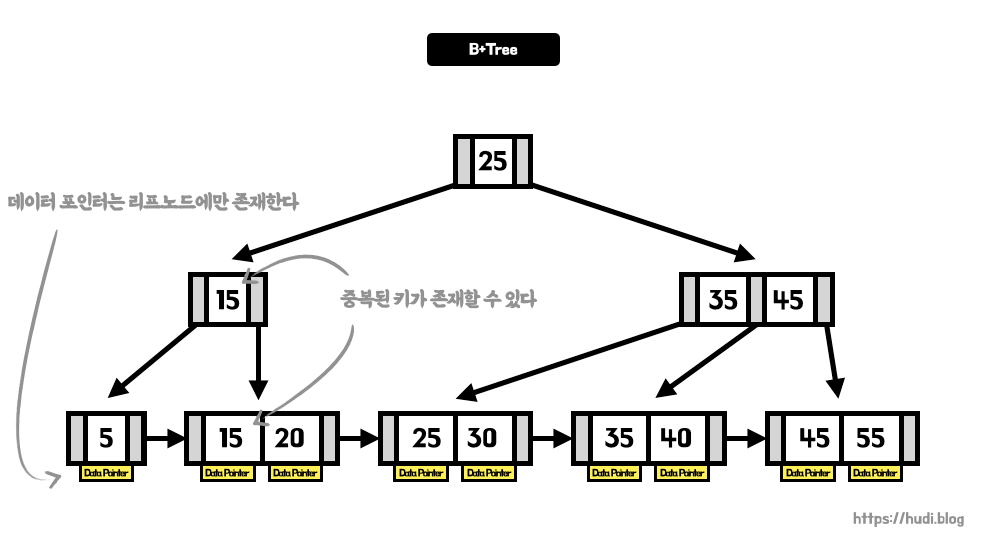

- B+Tree는 B-Tree를 개선시킨 자료구조.
- MySQL(InnoDB) 등 많은 DBMS에서는 B-Tree대신 B+Tree를 사용.

- B+Tree는 B-Tree와 다르게 오직 리프 노드의 키만 데이터 포인터를 가지고 있다.
-  B-Tree와 다르게, 리프 노드에만 데이터 포인터가 존재하므로 노드에 더 많은 키를 보관할 수 있게 된다.
- 트리의 높이가 낮아지는 것을 의미하고, 탐색 속도가 B-Tree에 비해 더 향상됨을 의미한다.
  - 다만, 이런 특징으로 트리에 중복된 키가 존재할 수 있다.

- B+Tree는 B-Tree과 다르게 순차 검색에 유리.
  - 데이터베이스 특성상 부등호 연산이 많이 발생.
  - 이때, B-Tree는 트리 순회를 해야하기 때문에 부등호 연산이 조금 오래걸림.
  - 단점을 극복하기 위해 B+Tree는 리프 노드를 연결 리스트(linked list)로 연결.
  - 정렬된 상태의 리프 노드를 순차 검색할 수 있게 된 것이다. 이로 인해 인덱싱에 더욱 적합한 자료구조가 될 수 있었다.

- B+Tree에서는 실제 데이터에 접근하기 위해서는 무조건 리프 노드까지 탐색해야한다.
- 운이 좋으면, 금방 데이터를 찾을수도 있는 B-Tree와 다르게, B+Tree는 고정적으로 O(logN)의 탐색 시간을 갖는다.

